# ***`5. In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.`***

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [ ]:
Default_Data = pd.read_csv("Default.csv")
Default_Data

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [ ]:
Default_Data["binary_default"] = Default_Data["default"].map({'Yes':1, "No":0})
Default_Data[Default_Data["binary_default"] ==1]

,default,student,balance,income,binary_default
136,Yes,Yes,1486.998122,17854.397028,1
173,Yes,Yes,2205.799521,14271.492253,1
201,Yes,Yes,1774.694223,20359.506086,1
206,Yes,No,1889.599190,48956.171589,1
209,Yes,Yes,1899.390626,20655.200003,1
...,...,...,...,...,...
9912,Yes,No,2148.898454,44309.917173,1
9921,Yes,Yes,1627.898323,17546.997016,1
9949,Yes,No,1750.253150,51578.940163,1
9951,Yes,No,1515.606239,48688.512086,1


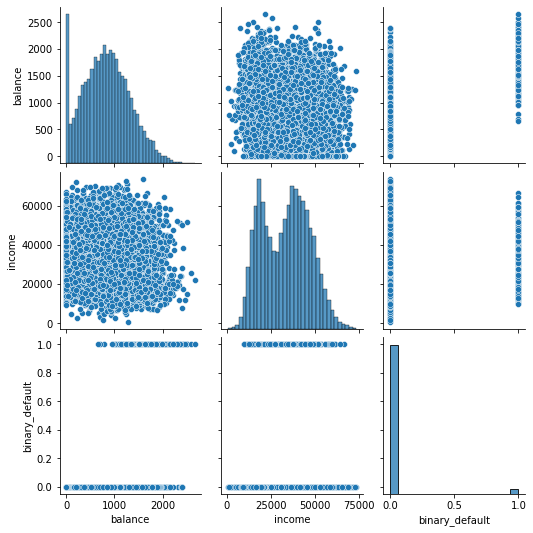

In [ ]:
sns.pairplot(Default_Data)

# ***`a. Fit a logistic regression model that uses income and balance to predict default.`***

In [ ]:
Logis_Model = smf.logit("binary_default ~ balance+income", data=Default_Data)
Logis_Model = Logis_Model.fit()
Logis_Model.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         binary_default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 25 Nov 2020   Pseudo R-squ.:                  0.4594
Time:                        01:28:15   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# ***`b. Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:`***

# ***`i. Split the sample set into a training set and a validation set.`***

In [ ]:
x = Default_Data[["balance", "income"]]
y = Default_Data["binary_default"]
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size = 0.3)

# ***`ii. Fit a multiple logistic regression model using only the training observations.`***

In [ ]:
train_model = sm.Logit(y_train,x_train)
train_logit = train_model.fit()

Optimization terminated successfully.
         Current function value: 0.169757
         Iterations 8


# ***`iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.`***

In [ ]:
y_predicted = np.array(train_logit.predict(x_test) > 0.5, dtype=float)

# ***`iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.`***

In [ ]:
error_rate = np.mean(y_predicted != y_test)
error_rate

0.036

# ***`c. Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.`***

In [ ]:
for i in range(1, 4):
  np.random.seed(i)
  x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size = 0.3)
  train_model = sm.Logit(y_train,x_train)
  train_logit = train_model.fit()
  y_predicted = np.array(train_logit.predict(x_test) > 0.5, dtype=float)
  error_rate = np.mean(y_predicted != y_test)
  print("Error of time",i, ": ",error_rate)

Optimization terminated successfully.
         Current function value: 0.180484
         Iterations 8
Error of time 1 :  0.030333333333333334
Optimization terminated successfully.
         Current function value: 0.184689
         Iterations 8
Error of time 2 :  0.026
Optimization terminated successfully.
         Current function value: 0.170947
         Iterations 8
Error of time 3 :  0.035666666666666666


# ***`d. Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.`***

In [ ]:
Default_Data["dumpy_student"] = Default_Data["student"].map({'Yes':1, "No":0})
Default_Data

,default,student,balance,income,binary_default,dumpy_student
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0
...,...,...,...,...,...,...
9995,No,No,711.555020,52992.378914,0,0
9996,No,No,757.962918,19660.721768,0,0
9997,No,No,845.411989,58636.156984,0,0
9998,No,No,1569.009053,36669.112365,0,0


In [ ]:
x = Default_Data[["balance", "income", "dumpy_student"]]
y = Default_Data["binary_default"]
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size = 0.3)
train_model = sm.Logit(y_train,x_train)
train_logit = train_model.fit()
y_predicted = np.array(train_logit.predict(x_test) > 0.5, dtype=float)
error_rate = np.mean(y_predicted != y_test)

Optimization terminated successfully.
         Current function value: 0.121156
         Iterations 9
